<a href="https://colab.research.google.com/github/tincho-mehaudy/DMCyT/blob/master/Clustering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import datasets
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

([], <a list of 0 Text major ticklabel objects>)

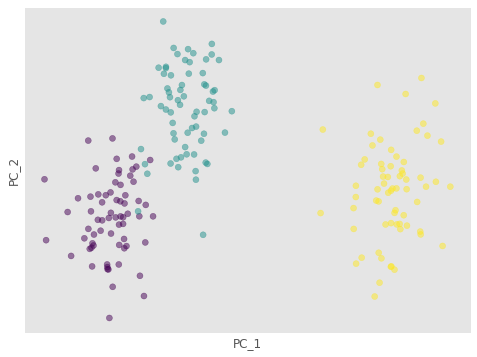

In [ ]:
## Cargo datos de IRIS
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Agrego outliers
#X = np.vstack([np.max(X,axis=0)*2, X])
#y = np.hstack([0, y])

## Cargo datos de WINE
#wine = datasets.load_wine()
#X = wine.data
#y = wine.target

## Cargo datos de IRIS
#X, y = datasets.make_blobs(n_samples=200, n_features=4, centers=None, center_box=[-10.0, 10.0], cluster_std=2.0, shuffle=True, random_state=13) 

# Agrego outliers 
#X = np.vstack([np.max(X,axis=0)*2, X])
#y = np.hstack([0, y])


# Proyecto los datos sobre PC_1 y PC_2 para graficar
pca.fit(X)
x_pca = pca.transform(X)

# Grafico los datos con las etiquetas originales
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, alpha = 0.5, edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

# k-means desde cero, sin usar SciKit Learn como para entender que hace

## Primero, algunas funciones útiles

In [ ]:
# Esta función calcula la distacia euclidea entre dos elementos. 
# Como vimos en la clase, puede cambiarse junto a la función 
# objetivo.
def distancia_euclidea(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [ ]:
# Esta función calcula los centroides, lo hace con el promedio acorde al uso de 
# la distancia euclidea (y es común para muchas distancias), pero podría tener 
# otra definición si usasemos por ejemplo la distancia Manhattan.
def calcular_centroides(X,etiquetas,k):
  centroides = []
  for j in range(0,k):
    # [e==i for e in etiquetas]
    ind = [i for i, e in enumerate(etiquetas) if e==j]
    centroides.append(np.mean(X[ind,:], axis=0))
  return centroides

In [ ]:
# Asigna los elementos a los clusters de acuerdo a la noción de distancia que 
# definimos más arriba
def asignar_clusters(X,centroides):
  etiquetas = []
  for i in range(0,len(X)):
    distancias = []
    for CC in centroides:
      distancias.append(distancia_euclidea(X[i,:], CC) )
    etiquetas.append(np.argmin(distancias) )
  return etiquetas

In [ ]:
# Suma las distancias al centroide dentro de cada cluster (errores cuadráticos),
# y después suma entre clusters
def calcula_sse(X,centroides,etiquetas,k):
  se = []
  for j in range(0,k):
    # [e==i for e in etiquetas]
    ind = [i for i, e in enumerate(etiquetas) if e==j]
    Y = X[ind,:]
    se.append( sum( [distancia_euclidea(y,centroides[j])**2 for y in Y] ) )
    # C = np.mean(Y, axis=0)
    # se.append( sum( [distancia_euclidea(y,C) for y in Y] ) )
  return sum(se)

In [ ]:
# Elijo el valor de k, en este caso se que el mejor es 3, pero podría probar 
# otros.
k = 3

([], <a list of 0 Text major ticklabel objects>)

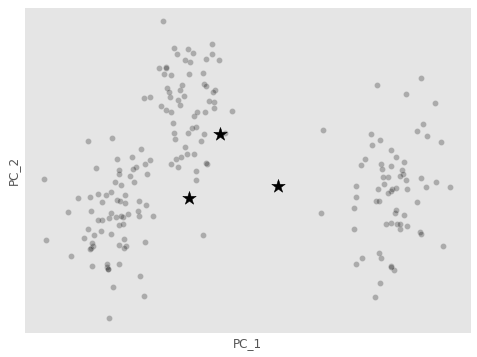

In [ ]:
# Inicialización: Elegir k puntos al azar, por ejemplo entre lo ejemplares del dataset 

#Condiciones iniciales aleatoreas
np.random.seed(0)
idx = np.random.choice(len(X),size=k,replace=False)
centroides = X[idx,:]

#Malas condiciones iniciales
idx = [0,1,2]
centroides = X[idx,:]

centroides_pca = pca.fit_transform(centroides)

plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            color='k', alpha=.25, edgecolor='w')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], 
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

In [ ]:
etiquetas = asignar_clusters(X,centroides)
np.unique(etiquetas)

array([0, 1, 2])

([], <a list of 0 Text major ticklabel objects>)

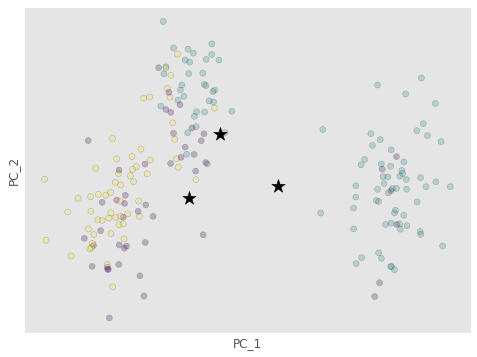

In [ ]:
plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=etiquetas, alpha=.25, edgecolor='k')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], 
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

In [ ]:
centroides = calcular_centroides(X,etiquetas,k)
centroides_pca = pca.transform(centroides)  

([], <a list of 0 Text major ticklabel objects>)

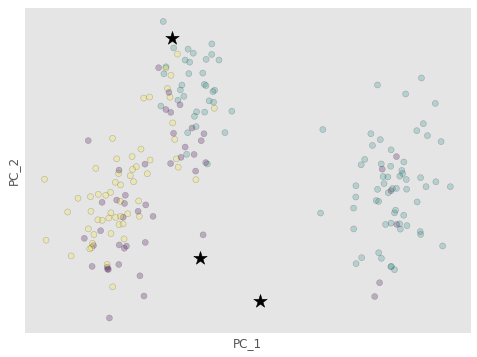

In [ ]:
plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=etiquetas, alpha=.25, edgecolor='k')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], 
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

-----------------------------------
49.202819063782535
61
3547.4979618768007
-----------------------------------
2.16279471739511
18
2941.077282051089
-----------------------------------
0.027641839838991704
1
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0
0
2928.3905395218153
-----------------------------------
0.0

([], <a list of 0 Text major ticklabel objects>)

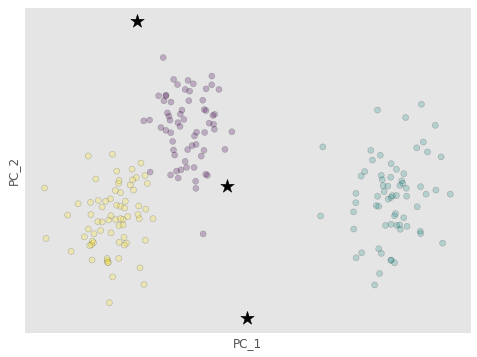

In [ ]:
n_iter_max = 20
sse = []
for n in range(0,n_iter_max):
  centroides_old = centroides
  etiquetas_old = etiquetas
  etiquetas = asignar_clusters(X,centroides)
  centroides = calcular_centroides(X,etiquetas,k)

  print('-----------------------------------')
  print( np.sum(  np.sum( ( np.array(centroides)-np.array(centroides_old) )**2, axis=1 ) ) )
  print( sum( [new!=old for new, old in zip(etiquetas, etiquetas_old)] ) )
  print( calcula_sse(X,centroides,etiquetas,k) )
  sse.append(calcula_sse(X,centroides,etiquetas,k))

centroides_pca = pca.transform(centroides)  
plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=etiquetas, alpha=.25, edgecolor='k')
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], 
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())

Text(0, 0.5, 'iter')

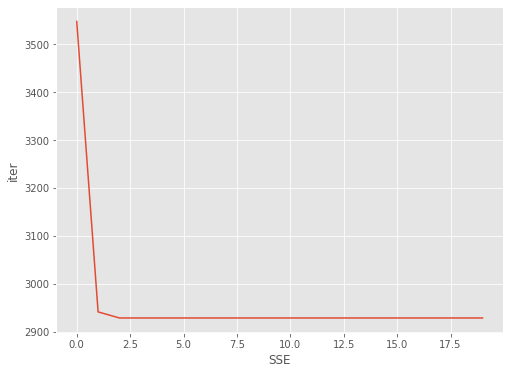

In [ ]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.plot(sse)
plt.xlabel('# Iteración')
plt.ylabel('SSE')

# Con SciKitLearn

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=k).fit(X)

([], <a list of 0 Text major ticklabel objects>)

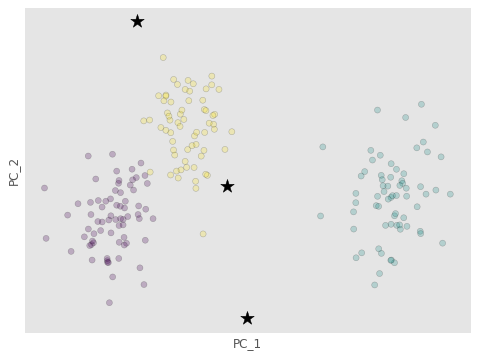

In [ ]:
centroides_sklean_pca = pca.transform(kmeans.cluster_centers_)
plt.figure(1, figsize=(8, 6))
plt.clf()
#plt.scatter(x[:, 0], x[:, 1], color='k', alpha=.25, edgecolor='k')
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
            c=kmeans.labels_, alpha=.25, edgecolor='k')
plt.scatter(centroides_sklean_pca[:, 0], centroides_sklean_pca[:, 1], 
            s=200, marker = '*', c='k', edgecolor=None)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xticks(())
plt.yticks(())